In [1]:
import os
os.chdir("/gpfs/home/asun/jin_lab/perturbench/0_datasets")
print(os.getcwd())

import sys
sys.path.append(os.path.abspath('..'))


/gpfs/group/jin/asun/perturbench/0_datasets


In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
avg_p = boli_wb_filt[boli_wb_filt.obs["condition"] == "TBR1+ctrl", :].X.mean(0)
avg_ctrl = boli_wb_filt[boli_wb_filt.obs["condition"] == "ctrl", :].X.mean(0)

# Boli Whole Brain

In [20]:
boli_wb = sc.read_h5ad("/gpfs/home/asun/processed.h5ad")
boli_ctx = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')


/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [82]:
boli_ctx.obs["cell_type"].value_counts()

cell_type
L6_CT_CTX     7860
L5_PT_CTX     3710
L5_NP_CTX     2755
L6_IT_CTX     2544
L5_IT_CTX     1939
Pvalb         1317
Sst            838
L3_RSP-ACA     370
L6b_CTX        367
Name: count, dtype: int64

In [21]:
sc.pp.normalize_total(boli_wb)
sc.pp.log1p(boli_wb)

In [24]:
boli_wb_filt = boli_wb[:, boli_wb.var_names.isin(boli_ctx.var_names)].copy()

/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [25]:
boli_wb_filt.obs_names_make_unique()

In [74]:
boli_wb_filt.obs

,sample,class_label,class_name,class_bootstrapping_probability,subclass_label,subclass_name,subclass_bootstrapping_probability,supertype_label,supertype_name,supertype_bootstrapping_probability,...,predicted.cluster.score,predicted.cluster,predicted.subclass.score,predicted.subclass,predicted.cross_species_cluster.score,predicted.cross_species_cluster,mapping.score,unintegrated_clusters,seurat_clusters,condition
AAACCAGCAGGCGTAG-1,Ch1,CS20230722_CLAS_31,31 OPC-Oligo,0.88,CS20230722_SUBC_326,326 OPC NN,1.0,CS20230722_SUPT_1179,1179 OPC NN_1,1.0,...,1.000000,OPC Pdgfra,1.000000,OPC,1.000000,OPC,0.999599,21,28,BCL11B+ctrl
AAACCAGCAGTATGTC-1,Ch1,CS20230722_CLAS_01,01 IT-ET Glut,1.0,CS20230722_SUBC_022,022 L5 ET CTX Glut,1.0,CS20230722_SUPT_0093,0093 L5 ET CTX Glut_4,1.0,...,0.448311,L5 ET_2,1.000000,L5 ET,0.551689,L5 ET_1,0.456108,26,32,SATB2+ctrl
AAACCGACACAATGGA-1,Ch1,CS20230722_CLAS_01,01 IT-ET Glut,1.0,CS20230722_SUBC_006,006 L4/5 IT CTX Glut,0.97,CS20230722_SUPT_0027,0027 L4/5 IT CTX Glut_5,1.0,...,0.802067,L2/3 IT_3,0.802067,L2/3 IT,0.802067,L2/3 IT,0.939731,37,6,BCL11B+ctrl
AAACCGACACATTCCC-1,Ch1,CS20230722_CLAS_01,01 IT-ET Glut,0.99,CS20230722_SUBC_005,005 L5 IT CTX Glut,1.0,CS20230722_SUPT_0019,0019 L5 IT CTX Glut_2,0.98,...,1.000000,L5 IT S100b_1,1.000000,L5 IT,1.000000,L5 IT_2,0.897305,39,8,XPO7+ctrl
AAACCGCTCACATTCC-1,Ch1,CS20230722_CLAS_01,01 IT-ET Glut,0.99,CS20230722_SUBC_004,004 L6 IT CTX Glut,1.0,CS20230722_SUPT_0016,0016 L6 IT CTX Glut_4,1.0,...,0.671821,L6 IT_1,1.000000,L6 IT,0.671821,L6 IT_1,0.954085,12,2,BCL11B+ctrl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTTGTATAGGTCGACT-1,Ch3,CS20230722_CLAS_01,01 IT-ET Glut,0.82,CS20230722_SUBC_006,006 L4/5 IT CTX Glut,0.98,CS20230722_SUPT_0025,0025 L4/5 IT CTX Glut_3,0.85,...,0.955347,L5 IT S100b_1,1.000000,L5 IT,0.955347,L5 IT_2,0.709574,34,4,ctrl
GTTGTCCGTCGTGAGC-1,Ch3,CS20230722_CLAS_01,01 IT-ET Glut,1.0,CS20230722_SUBC_004,004 L6 IT CTX Glut,1.0,CS20230722_SUPT_0013,0013 L6 IT CTX Glut_1,0.63,...,0.736452,L6 IT_2,0.974716,L6 IT,0.761736,L6 IT_2,0.767684,12,2,ctrl
GTTGTGCAGGGTACGA-1,Ch3,CS20230722_CLAS_07,07 CTX-MGE GABA,0.97,CS20230722_SUBC_052,052 Pvalb Gaba,1.0,CS20230722_SUPT_0212,0212 Pvalb Gaba_8,0.92,...,0.820167,Pvalb Gpr149,1.000000,Pvalb,0.946425,Pvalb_1,0.945000,5,13,BCL11B+ctrl
GTTGTGGGTGGCAAGG-1,Ch3,CS20230722_CLAS_01,01 IT-ET Glut,0.99,CS20230722_SUBC_006,006 L4/5 IT CTX Glut,0.65,CS20230722_SUPT_0026,0026 L4/5 IT CTX Glut_4,0.85,...,0.850963,L5 IT Rspo1_2,0.954688,L5 IT,0.943559,L5 IT_1,0.650779,34,4,RB1CC1+ctrl


In [44]:
import numpy as np
from scipy import sparse

cell_type_col   = "cell_type"      # e.g. "class_name" / "mmc_label"
cell_type_value = "030 L6 CT CTX Glut"  # <-- set this
condition_col   = "condition"

mask = (boli_wb_filt.obs[condition_col] == "TBR1+ctrl") & \
       (boli_wb_filt.obs[cell_type_col] == cell_type_value)

X = boli_wb_filt.X
avg_p = X[mask].mean(axis=0)
avg_p = avg_p.A1 if sparse.issparse(avg_p) else np.asarray(avg_p).ravel()

In [45]:
cell_type_col   = "cell_type"      # e.g. "class_name" / "mmc_label"
cell_type_value = "030 L6 CT CTX Glut"  # <-- set this
condition_col   = "condition"

mask = (boli_wb_filt.obs[condition_col] == "ctrl") & \
       (boli_wb_filt.obs[cell_type_col] == cell_type_value)

X = boli_wb_filt.X
avg_ctrl = X[mask].mean(axis=0)
avg_ctrl = avg_ctrl.A1 if sparse.issparse(avg_ctrl) else np.asarray(avg_ctrl).ravel()

In [46]:
pseudocount = 0.1
avg_p = np.log2(avg_p + pseudocount)
avg_ctrl = np.log2(avg_ctrl + pseudocount)

logfc = avg_p - avg_ctrl


In [47]:
# Create dataframe with gene names as columns and logFC as a single row
gene_names = boli_wb_filt.var["gene_name"]  # or boli_wb_filt.var.index
logfc_df = pd.DataFrame([logfc], columns=gene_names)

print(logfc_df)

gene_name  Rp1  Sox17   Gm37323     Rgs20    Oprk1    Alkal1      St18  \
0          0.0    0.0 -0.011262  0.115602  0.30406  0.173014  0.018234   

gene_name      Vxn      Cpa6     Prex2  ...    mt-Co1    mt-Co2   mt-Atp8  \
0         -0.15696  0.033969  0.201582  ...  0.077125 -0.409733 -0.170128   

gene_name   mt-Atp6    mt-Co3  mt-Nd4l    mt-Nd4    mt-Nd5   mt-Cytb  \
0         -0.312572  0.093016   -0.252 -0.187675 -0.285945  0.131755   

gene_name  CAAA01147332.1  
0                0.030676  

[1 rows x 5000 columns]


In [61]:
print(boli_wb_filt.obs["cell_type"].value_counts().to_string())

cell_type
030 L6 CT CTX Glut                        2586
022 L5 ET CTX Glut                        1629
006 L4/5 IT CTX Glut                      1589
005 L5 IT CTX Glut                        1236
004 L6 IT CTX Glut                        1030
032 L5 NP CTX Glut                         738
020 L2/3 IT RSP Glut                       504
007 L2/3 IT CTX Glut                       451
021 L4 RSP-ACA Glut                        448
052 Pvalb Gaba                             277
037 DG Glut                                267
019 L2/3 IT PPP Glut                       252
053 Sst Gaba                               227
036 HPF CR Glut                            205
187 SCsg Pde5a Glut                        201
207 SCs Dmbx1 Gaba                         145
311 CBX MLI Megf11 Gaba                    144
177 SCig-an-PPT Foxb1 Glut                 137
023 SUB-ProS Glut                          135
213 SCsg Gabrr2 Gaba                       131
003 L5/6 IT TPE-ENT Glut                   131
028

In [50]:
import numpy as np
from scipy import sparse

cell_type_col   = "cell_type"      # e.g. "class_name" / "mmc_label"
cell_type_value = "L6_CT_CTX"  # <-- set this
condition_col   = "condition"
control_value = "ctrl"
perturbation_value = "TBR1"

mask = (boli_ctx.obs[condition_col] == perturbation_value) & \
       (boli_ctx.obs[cell_type_col] == cell_type_value)

X = boli_ctx.X
avg_p = X[mask].mean(axis=0)
avg_p = avg_p.A1 if sparse.issparse(avg_p) else np.asarray(avg_p).ravel()

mask = (boli_ctx.obs[condition_col] == control_value) & \
       (boli_ctx.obs[cell_type_col] == cell_type_value)

X = boli_ctx.X
avg_ctrl = X[mask].mean(axis=0)
avg_ctrl = avg_ctrl.A1 if sparse.issparse(avg_ctrl) else np.asarray(avg_ctrl).ravel()

pseudocount = 0.1
avg_p = np.log2(avg_p + pseudocount)
avg_ctrl = np.log2(avg_ctrl + pseudocount)

logfc = avg_p - avg_ctrl

# Create dataframe with gene names as columns and logFC as a single row
gene_names = boli_ctx.var["gene_name"]  # or boli_wb_filt.var.index
logfc_ctx_df = pd.DataFrame([logfc], columns=gene_names)

print(logfc_ctx_df)

gene_name  Rp1  Sox17  Gm37323     Rgs20     Oprk1    Alkal1      St18  \
0          0.0    0.0      0.0  0.373312  0.707268 -0.067299  0.010142   

gene_name       Vxn      Cpa6     Prex2  ...    mt-Co1   mt-Co2   mt-Atp8  \
0         -0.052922 -0.199476  0.771596  ...  0.156112  0.24932  0.103567   

gene_name   mt-Atp6    mt-Co3   mt-Nd4l    mt-Nd4   mt-Nd5   mt-Cytb  \
0          0.262235  0.286904  0.192961  0.039711  0.12067  0.217222   

gene_name  CAAA01147332.1  
0                0.010982  

[1 rows x 5000 columns]


In [91]:
import numpy as np
import pandas as pd
from scipy import sparse

def calculate_logfc(adata, cell_type_value, perturbation_value, control_value="ctrl", 
                   cell_type_col="cell_type", condition_col="condition", 
                   gene_name_col="gene_name", pseudocount=0.1):
    """
    Calculate log2 fold change between perturbation and control for a specific cell type.
    
    Parameters:
    - adata: AnnData object
    - cell_type_value: Cell type to filter (e.g., "L6_CT_CTX")
    - perturbation_value: Perturbation condition (e.g., "TBR1")
    - control_value: Control condition (default: "ctrl")
    - cell_type_col: Column name for cell type in adata.obs (default: "cell_type")
    - condition_col: Column name for condition in adata.obs (default: "condition")
    - gene_name_col: Column name for gene names in adata.var (default: "gene_name")
    - pseudocount: Pseudocount to add before log transformation (default: 0.1)
    
    Returns:
    - logfc_df: DataFrame with gene names as columns and logFC values as a single row
    """
    
    # Get perturbation condition average
    mask_p = (adata.obs[condition_col] == perturbation_value) & \
             (adata.obs[cell_type_col] == cell_type_value)
    
    X = adata.X
    avg_p = X[mask_p].mean(axis=0)
    avg_p = avg_p.A1 if sparse.issparse(avg_p) else np.asarray(avg_p).ravel()
    
    # Get control condition average
    mask_ctrl = (adata.obs[condition_col] == control_value) & \
                (adata.obs[cell_type_col] == cell_type_value)
    
    avg_ctrl = X[mask_ctrl].mean(axis=0)
    avg_ctrl = avg_ctrl.A1 if sparse.issparse(avg_ctrl) else np.asarray(avg_ctrl).ravel()
    
    # Calculate log2 fold change
    avg_p_log = np.log2(avg_p + pseudocount)
    avg_ctrl_log = np.log2(avg_ctrl + pseudocount)

    logfc = avg_p_log - avg_ctrl_log

    # # scanpy calculate logfc 
    # epsilon = 1e-9
    # avg_p_log = np.expm1(avg_p) + epsilon
    # avg_ctrl_log = np.expm1(avg_ctrl) + epsilon

    # logfc = np.log2(avg_p_log / avg_ctrl_log)
    
    # Create dataframe with gene names as columns and logFC as a single row
    gene_names = adata.var[gene_name_col]
    logfc_df = pd.DataFrame([logfc], columns=gene_names)
    
    return logfc_df

# Example usage:
logfc_df_ctx = calculate_logfc(boli_ctx, cell_type_value="L6_CT_CTX", perturbation_value="TBR1")

# For wb data:
logfc_df_wb = calculate_logfc(boli_wb_filt, cell_type_value="030 L6 CT CTX Glut", perturbation_value="TBR1+ctrl")

In [90]:
print(f"boli_ctx.X range: {boli_ctx.X.min():.2f} to {boli_ctx.X.max():.2f}")


boli_ctx.X range: 0.00 to 6.77


In [75]:
# Example usage:
logfc_df_ctx = calculate_logfc(boli_ctx, cell_type_value="L6_CT_CTX", perturbation_value="TBR1")

# For wb data:
logfc_df_wb = calculate_logfc(boli_wb_filt, cell_type_value="030 L6 CT CTX Glut", perturbation_value="TBR1+ctrl")

In [ ]:
# Example usage:
logfc_df_ctx = calculate_logfc(boli_ctx, cell_type_value="L6_CT_CTX", perturbation_value="TBR1")

# For wb data:
logfc_df_wb = calculate_logfc(boli_wb_filt, cell_type_value="030 L6 CT CTX Glut", perturbation_value="TBR1+ctrl")

In [99]:
# Example usage:
logfc_df_ctx = calculate_logfc(boli_ctx, cell_type_value="L5_IT_CTX", perturbation_value="SATB2")

# For wb data:
logfc_df_wb = calculate_logfc(boli_wb_filt, cell_type_value="005 L5 IT CTX Glut", perturbation_value="SATB2+ctrl")

In [67]:
# Example usage:
logfc_df_ctx = calculate_logfc(boli_ctx, cell_type_value="L6_IT_CTX", perturbation_value="CUL1")

# For wb data:
logfc_df_wb = calculate_logfc(boli_wb_filt, cell_type_value="004 L6 IT CTX Glut", perturbation_value="CUL1+ctrl")


In [77]:
top100deg = pd.read_csv('/gpfs/home/asun/jin_lab/perturbench/0_datasets/top100_ctx_tbr1_L6_CT_CTX.csv')


In [98]:
top100deg = pd.read_csv('/gpfs/home/asun/jin_lab/perturbench/0_datasets/top100_ctx_satb2_L5_IT_CTX.csv')


In [78]:
top100deg

,Unnamed: 0.1,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,subclass,group
0,4164765,4164765,Kcnip4,20.953510,1.896388,1.742964e-97,5.627159e-93,L6 CT CTX,Tbr1
1,4164766,4164766,Tafa1,16.464207,4.108785,6.632727e-61,1.070688e-56,L6 CT CTX,Tbr1
2,4164767,4164767,Pcdh15,16.166014,1.934985,8.758482e-59,9.425586e-55,L6 CT CTX,Tbr1
3,4164768,4164768,Lrrc4c,15.896252,1.199286,6.727152e-57,5.429653e-53,L6 CT CTX,Tbr1
4,4197049,4197049,Pdzrn4,-15.841051,-2.381759,1.620884e-56,1.046605e-52,L6 CT CTX,Tbr1
...,...,...,...,...,...,...,...,...,...
95,4164816,4164816,Jmjd1c,7.678758,0.586550,1.606384e-14,5.402304e-12,L6 CT CTX,Tbr1
96,4164817,4164817,Slc2a13,7.637299,0.725432,2.218267e-14,7.383172e-12,L6 CT CTX,Tbr1
97,4164818,4164818,Peak1,7.632086,0.755560,2.309844e-14,7.609521e-12,L6 CT CTX,Tbr1
98,4197005,4197005,Lrp1b,-7.618109,-0.512977,2.574194e-14,8.394732e-12,L6 CT CTX,Tbr1


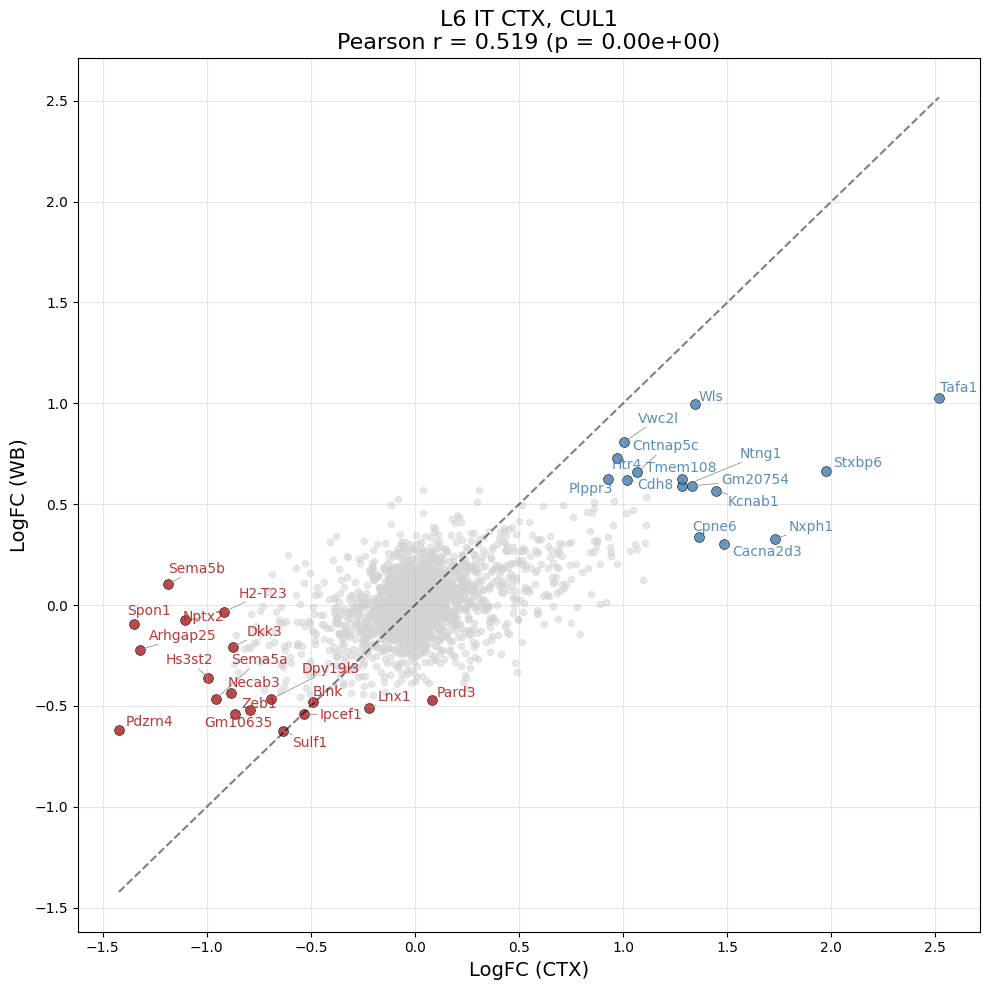

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from adjustText import adjust_text

# Assuming you have logfc_df_ctx and logfc_df_wb
# Both should have the same gene columns

# Get common genes between the two datasets
common_genes = logfc_df_ctx.columns.intersection(logfc_df_wb.columns)

# Extract logFC values for common genes
x_vals = logfc_df_ctx[common_genes].values[0]
y_vals = logfc_df_wb[common_genes].values[0]

# Calculate correlation
pearson_r, p_value = pearsonr(x_vals, y_vals)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot
ax.scatter(x_vals, y_vals, alpha=0.5, color="lightgray", s=20)

# Identity line
min_val = min(x_vals.min(), y_vals.min())
max_val = max(x_vals.max(), y_vals.max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')

# Labels and title
ax.set_xlabel("LogFC (CTX)", fontsize=14)
ax.set_ylabel("LogFC (WB)", fontsize=14)
ax.set_title(f"L6 IT CTX, CUL1\nPearson r = {pearson_r:.3f} (p = {p_value:.2e})", fontsize=16)
ax.grid(True, alpha=0.3)

# Highlight top/bottom genes
top10_ctx_idx = np.argsort(x_vals)[-10:]
bottom10_ctx_idx = np.argsort(x_vals)[:10]
top10_wb_idx = np.argsort(y_vals)[-10:]
bottom10_wb_idx = np.argsort(y_vals)[:10]

# Combine indices for labeling (genes that are extreme in either dataset)
genes_to_label = set(top10_ctx_idx).union(set(bottom10_ctx_idx)).union(
                     set(top10_wb_idx)).union(set(bottom10_wb_idx))

# Color coding
texts = []
for idx in genes_to_label:
    if idx in top10_ctx_idx or idx in top10_wb_idx:
        color = "steelblue"
    else:
        color = "firebrick"
    
    # Scatter the highlighted points
    ax.scatter(x_vals[idx], y_vals[idx], color=color, s=50, alpha=0.8, edgecolors='black', linewidths=0.5)
    
    # Add text label
    texts.append(
        ax.text(
            x_vals[idx], y_vals[idx], common_genes[idx],
            fontsize=10,
            color=color,
            alpha=0.9
        )
    )

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

plt.tight_layout()
plt.show()

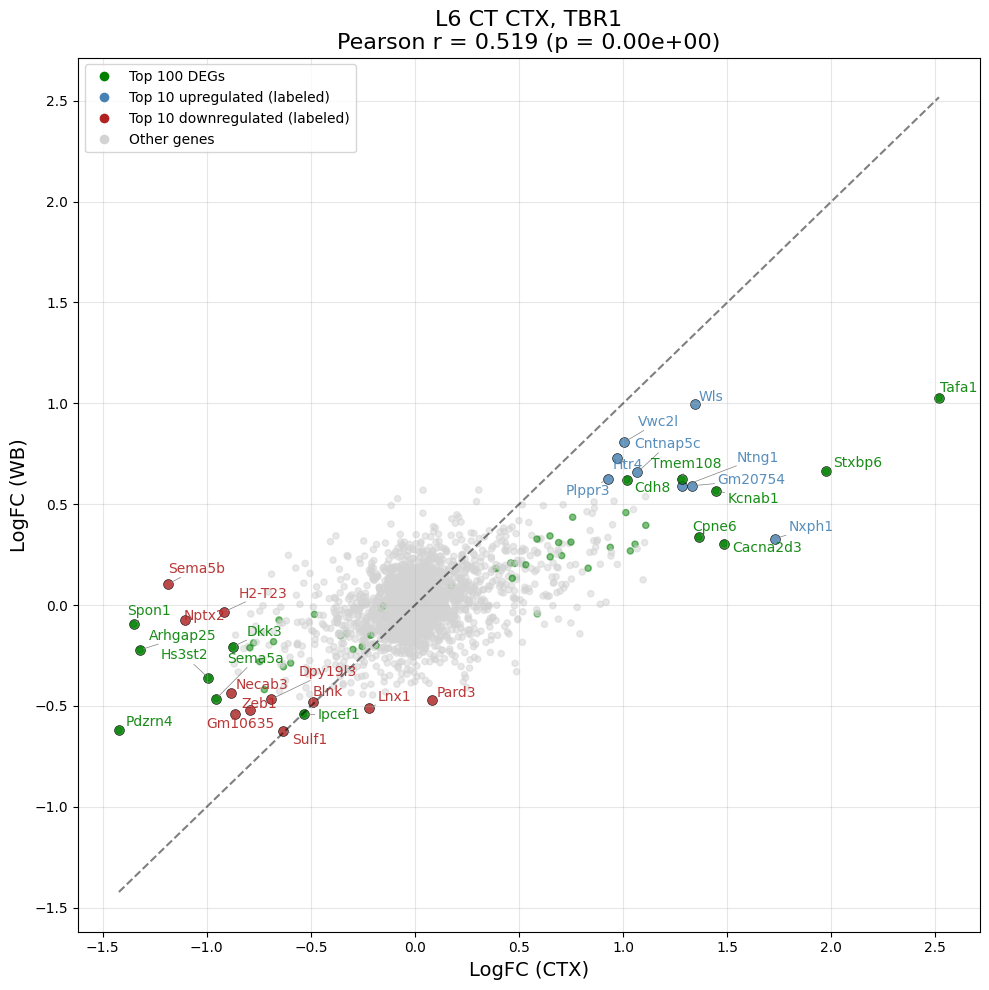

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from adjustText import adjust_text
from matplotlib.lines import Line2D


# Get the set of top 100 DEG gene names
top100_genes = set(top100deg['names'].values)

# Get common genes between the two datasets
common_genes = logfc_df_ctx.columns.intersection(logfc_df_wb.columns)

# Extract logFC values for common genes
x_vals = logfc_df_ctx[common_genes].values[0]
y_vals = logfc_df_wb[common_genes].values[0]

# Calculate correlation
pearson_r, p_value = pearsonr(x_vals, y_vals)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Scatter plot - color top100 genes green, others gray
colors = ['green' if gene in top100_genes else 'lightgray' for gene in common_genes]
ax.scatter(x_vals, y_vals, alpha=0.5, color=colors, s=20)

# Identity line
min_val = min(x_vals.min(), y_vals.min())
max_val = max(x_vals.max(), y_vals.max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')

# Labels and title
ax.set_xlabel("LogFC (CTX)", fontsize=14)
ax.set_ylabel("LogFC (WB)", fontsize=14)
ax.set_title(f"L6 CT CTX, TBR1\nPearson r = {pearson_r:.3f} (p = {p_value:.2e})", fontsize=16)
ax.grid(True, alpha=0.3)

# Highlight top/bottom genes
top10_ctx_idx = np.argsort(x_vals)[-10:]
bottom10_ctx_idx = np.argsort(x_vals)[:10]
top10_wb_idx = np.argsort(y_vals)[-10:]
bottom10_wb_idx = np.argsort(y_vals)[:10]

# Combine indices for labeling (genes that are extreme in either dataset)
genes_to_label = set(top10_ctx_idx).union(set(bottom10_ctx_idx)).union(
                     set(top10_wb_idx)).union(set(bottom10_wb_idx))

# Color coding
texts = []
for idx in genes_to_label:
    gene_name = common_genes[idx]
    
    # Determine color: green if in top100, otherwise blue/red based on direction
    if gene_name in top100_genes:
        color = "green"
    elif idx in top10_ctx_idx or idx in top10_wb_idx:
        color = "steelblue"
    else:
        color = "firebrick"
    
    # Scatter the highlighted points
    ax.scatter(x_vals[idx], y_vals[idx], color=color, s=50, alpha=0.8, edgecolors='black', linewidths=0.5)
    
    # Add text label
    texts.append(
        ax.text(
            x_vals[idx], y_vals[idx], gene_name,
            fontsize=10,
            color=color,
            alpha=0.9
        )
    )

# Create custom legend elements for labeled genes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Top 100 DEGs', 
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Top 10 upregulated (labeled)', 
           markerfacecolor='steelblue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Top 10 downregulated (labeled)', 
           markerfacecolor='firebrick', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Other genes', 
           markerfacecolor='lightgray', markersize=8)
]

ax.legend(handles=legend_elements, loc='best', fontsize=10)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

plt.tight_layout()
plt.show()

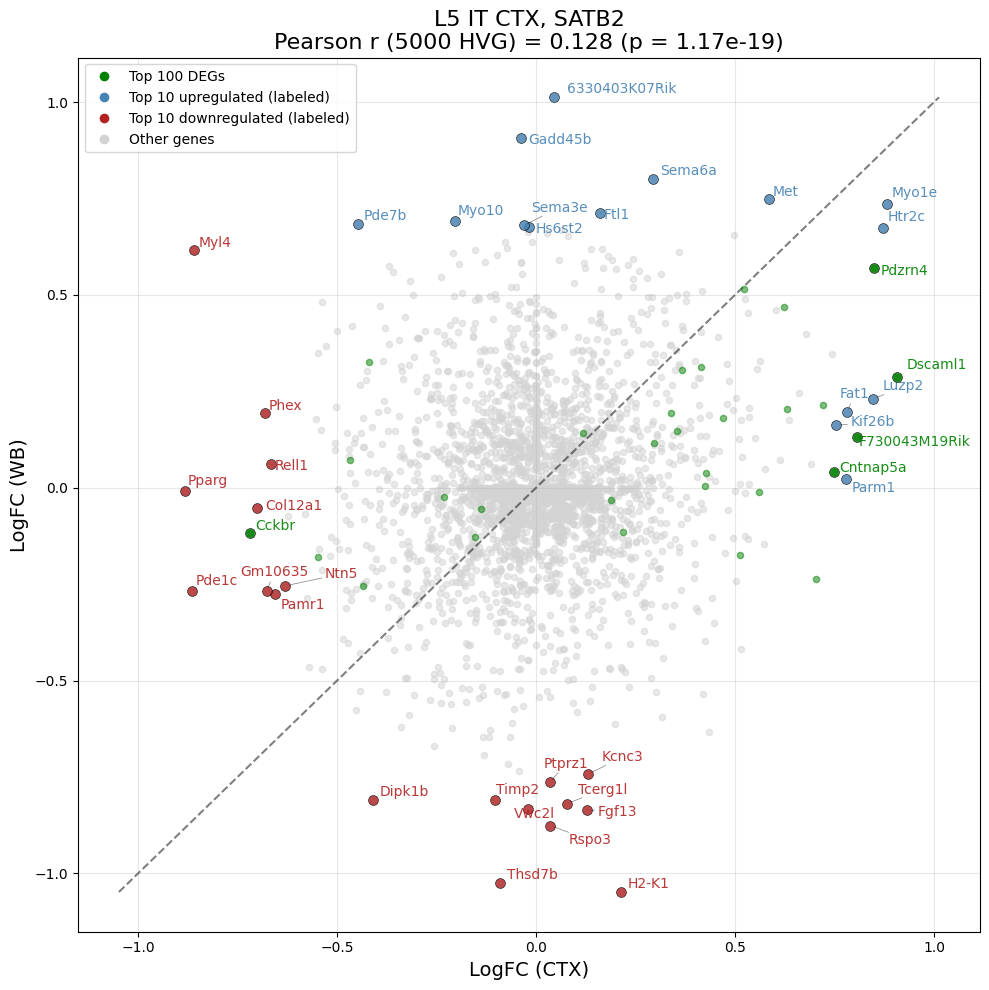

In [101]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from adjustText import adjust_text

# Get the set of top 100 DEG gene names
top100_genes = set(top100deg['names'].values)

# Get common genes between the two datasets
common_genes = logfc_df_ctx.columns.intersection(logfc_df_wb.columns)

# Extract logFC values for common genes
x_vals = logfc_df_ctx[common_genes].values[0]
y_vals = logfc_df_wb[common_genes].values[0]

# Calculate correlation
pearson_r, p_value = pearsonr(x_vals, y_vals)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Identity line
min_val = min(x_vals.min(), y_vals.min())
max_val = max(x_vals.max(), y_vals.max())
ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, label='y=x')

# First, plot all gray dots (background layer)
gray_mask = [gene not in top100_genes for gene in common_genes]
ax.scatter(x_vals[gray_mask], y_vals[gray_mask], alpha=0.5, color='lightgray', s=20, zorder=1)

# Then, plot green dots on top (foreground layer)
green_mask = [gene in top100_genes for gene in common_genes]
ax.scatter(x_vals[green_mask], y_vals[green_mask], alpha=0.5, color='green', s=20, zorder=2)

# Labels and title
ax.set_xlabel("LogFC (CTX)", fontsize=14)
ax.set_ylabel("LogFC (WB)", fontsize=14)
ax.set_title(f"L5 IT CTX, SATB2\nPearson r (5000 HVG) = {pearson_r:.3f} (p = {p_value:.2e})", fontsize=16)
ax.grid(True, alpha=0.3)

# Highlight top/bottom genes
top10_ctx_idx = np.argsort(x_vals)[-10:]
bottom10_ctx_idx = np.argsort(x_vals)[:10]
top10_wb_idx = np.argsort(y_vals)[-10:]
bottom10_wb_idx = np.argsort(y_vals)[:10]

# Combine indices for labeling (genes that are extreme in either dataset)
genes_to_label = set(top10_ctx_idx).union(set(bottom10_ctx_idx)).union(
                     set(top10_wb_idx)).union(set(bottom10_wb_idx))

# Color coding
texts = []
for idx in genes_to_label:
    gene_name = common_genes[idx]
    
    # Determine color: green if in top100, otherwise blue/red based on direction
    if gene_name in top100_genes:
        color = "green"
    elif idx in top10_ctx_idx or idx in top10_wb_idx:
        color = "steelblue"
    else:
        color = "firebrick"
    
    # Scatter the highlighted points with higher zorder
    ax.scatter(x_vals[idx], y_vals[idx], color=color, s=50, alpha=0.8, edgecolors='black', linewidths=0.5, zorder=3)
    
    # Add text label
    texts.append(
        ax.text(
            x_vals[idx], y_vals[idx], gene_name,
            fontsize=10,
            color=color,
            alpha=0.9
        )
    )

# Create custom legend elements for labeled genes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Top 100 DEGs', 
           markerfacecolor='green', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Top 10 upregulated (labeled)', 
           markerfacecolor='steelblue', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Top 10 downregulated (labeled)', 
           markerfacecolor='firebrick', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Other genes', 
           markerfacecolor='lightgray', markersize=8)
]

ax.legend(handles=legend_elements, loc='best', fontsize=10)

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from adjustText import adjust_text 
import pickle 
import math

pkl_res = "/gpfs/home/asun/jin_lab/perturbench/1_train/logs/train/multiruns/2025-09-22_15-59-22/0_boli_qual_high_amt_high/evaluation/eval.pkl"
with open(pkl_res, "rb") as f:
    eval_data = pickle.load(f)
model_name = "LatentAdditive"
df_pred = eval_data.aggr["logfc"][model_name].to_df()
df_ref = eval_data.aggr["logfc"]["ref"].to_df()
genes = boli.var["gene_name"].values


cell_perts = df_pred.index.tolist()
num_plots = len(cell_perts)
cols = int(math.ceil(math.sqrt(num_plots))) + 2
rows = int(math.ceil(num_plots / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
axes = axes.flatten()
for i, cell_pert in enumerate(cell_perts):
    ax = axes[i]
    x_vals = df_ref.loc[cell_pert].values
    y_vals = df_pred.loc[cell_pert].values
    cos_sim = cosine_similarity(x_vals.reshape(1, -1), y_vals.reshape(1, -1))[0, 0]

    top10_idx = np.argsort(x_vals)[-10:]
    bottom10_idx = np.argsort(x_vals)[:10]
    top_and_bottom_idx = set(top10_idx).union(set(bottom10_idx))

    colors = ["steelblue" if idx in top10_idx else "firebrick" for idx in range(len(y_vals))]

    ax.scatter(x_vals, y_vals, alpha=0.7, color="lightgray")
    ax.plot([x_vals.min(), x_vals.max()], [x_vals.min(), x_vals.max()], 'k--', alpha=0.5)
    ax.set_xlabel("Actual change in expression")
    ax.set_ylabel(f"Predicted expression ({model_name})")
    ax.set_title(f"{model_name} Prediction for {cell_pert} \nCosine similarity = {cos_sim:.3f}")
    ax.grid(True)

    texts = []
    for idx in top_and_bottom_idx:
        color = "steelblue" if idx in top10_idx else "firebrick"
        texts.append(
            ax.text(
                x_vals[idx], y_vals[idx], genes[idx],
                fontsize=12,
                color=color,
                alpha=0.9,
                ha='right' if idx in top10_idx else 'left',
                va='bottom'
            )
        )
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5), ax=ax)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [8]:
boli

AnnData object with n_obs × n_vars = 14511 × 32285
    obs: 'sample', 'class_label', 'class_name', 'class_bootstrapping_probability', 'subclass_label', 'subclass_name', 'subclass_bootstrapping_probability', 'supertype_label', 'supertype_name', 'supertype_bootstrapping_probability', 'cluster_label', 'cluster_name', 'cluster_alias', 'cluster_bootstrapping_probability', 'cell_type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CRISPR', 'nFeature_CRISPR', 'predicted.class.score', 'predicted.class', 'predicted.cluster.score', 'predicted.cluster', 'predicted.subclass.score', 'predicted.subclass', 'predicted.cross_species_cluster.score', 'predicted.cross_species_cluster', 'mapping.score', 'unintegrated_clusters', 'seurat_clusters', 'condition'
    var: 'gene_name'
    obsm: 'X_ref.umap', 'X_umap.unintegrated'
    layers: 'CRISPR'

In [7]:
boli.X[:20, :20].toarray()

array([[ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  

# Boli

In [3]:
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')
boli

AnnData object with n_obs × n_vars = 21700 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'Assign', 'scds', 'cxds', 'bcds', 'Sample', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'CT', 'mito', 'BioSamp', 'CT2', 'ForPlot', 'Remove', 'active_ident', 'Assign_clean', 'condition', 'cell_type', 'cell_class'
    var: 'variable_gene', 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p'

In [16]:
boli = sc.read_h5ad('/gpfs/home/asun/processed.h5ad')

boli

/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 14511 × 32285
    obs: 'sample', 'class_label', 'class_name', 'class_bootstrapping_probability', 'subclass_label', 'subclass_name', 'subclass_bootstrapping_probability', 'supertype_label', 'supertype_name', 'supertype_bootstrapping_probability', 'cluster_label', 'cluster_name', 'cluster_alias', 'cluster_bootstrapping_probability', 'cell_type', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_CRISPR', 'nFeature_CRISPR', 'predicted.class.score', 'predicted.class', 'predicted.cluster.score', 'predicted.cluster', 'predicted.subclass.score', 'predicted.subclass', 'predicted.cross_species_cluster.score', 'predicted.cross_species_cluster', 'mapping.score', 'unintegrated_clusters', 'seurat_clusters', 'condition'
    var: 'gene_name'
    obsm: 'X_ref.umap', 'X_umap.unintegrated'
    layers: 'CRISPR'

In [14]:
boli.obs["BioSamp"].value_counts()

BioSamp
batch1_samp1     7040
batch1_samp2     6136
batch2_mouse3    3963
batch2_mouse2    2757
batch2_mouse1    1804
Name: count, dtype: int64

In [15]:
boli.obs.groupby(["condition", "BioSamp"]).size()

/tmp/ipykernel_456/1518920177.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boli.obs.groupby(["condition", "BioSamp"]).size()


condition  BioSamp      
ANK3       batch1_samp1      321
           batch1_samp2      343
           batch2_mouse1     122
           batch2_mouse2     149
           batch2_mouse3     234
BCL11B     batch1_samp1     1325
           batch1_samp2     1042
           batch2_mouse1     269
           batch2_mouse2     409
           batch2_mouse3     501
CUL1       batch1_samp1      255
           batch1_samp2      229
           batch2_mouse1      76
           batch2_mouse2     158
           batch2_mouse3     241
CX3CL1     batch1_samp1      236
           batch1_samp2      252
           batch2_mouse1      61
           batch2_mouse2     175
           batch2_mouse3     224
DAB1       batch1_samp1      927
           batch1_samp2      848
           batch2_mouse1     199
           batch2_mouse2     320
           batch2_mouse3     393
HERC1      batch1_samp1      368
           batch1_samp2      368
           batch2_mouse1     121
           batch2_mouse2     211
           batch2_

In [12]:
boli.obs.groupby(["condition", "BioSamp", "cell_class"]).size()

/tmp/ipykernel_456/1821851034.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boli.obs.groupby(["condition", "BioSamp", "cell_class"]).size()


condition  BioSamp        cell_class
ANK3       batch1_samp1   NP             25
                          PT             59
                          ctL6          129
                          inhib          19
                          itRSP          89
                                       ... 
ctrl       batch2_mouse3  NP             27
                          PT             64
                          ctL6          115
                          inhib          47
                          itRSP          56
Length: 300, dtype: int64

In [8]:
boli.obs

,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters,Assign,scds,cxds,bcds,Sample,nCount_refAssay,...,mito,BioSamp,CT2,ForPlot,Remove,active_ident,Assign_clean,condition,cell_type,cell_class
batch1_samp1_chan1_AAACCTGAGACAAAGG-1,batch1,6831,2953,7,Bcl11b_0,1.323674,28996.749458,0.880423,batch1_samp1_chan1,6831,...,0.029278,batch1_samp1,030 L6 CT CTX Glut,batch1_samp1_Bcl11b_0,False,7,Bcl11b,BCL11B,L5_PT_CTX,PT
batch1_samp1_chan1_AAACCTGAGGCCGAAT-1,batch1,6016,2767,21,Bcl11b_0,0.487555,9829.195327,0.337222,batch1_samp1_chan1,6016,...,0.016622,batch1_samp1,029 L6b CTX Glut,batch1_samp1_Bcl11b_0,False,21,Bcl11b,BCL11B,L6b_CTX,ctL6
batch1_samp1_chan1_AAACCTGCACGGTAAG-1,batch1,8125,3272,6,Xpo7_0,0.330917,16108.872658,0.089554,batch1_samp1_chan1,8125,...,0.012308,batch1_samp1,022 L5 ET CTX Glut,batch1_samp1_Xpo7_0,False,6,Xpo7,XPO7,L5_PT_CTX,PT
batch1_samp1_chan1_AAACCTGCACTATCTT-1,batch1,5713,2476,21,Xpo7_0,0.557018,17380.257353,0.294270,batch1_samp1_chan1,5713,...,0.000000,batch1_samp1,029 L6b CTX Glut,batch1_samp1_Xpo7_0,False,21,Xpo7,XPO7,L6b_CTX,ctL6
batch1_samp1_chan1_AAACCTGCAGGGCATA-1,batch1,2321,1423,3,Trio_0,0.129805,8054.464267,0.009807,batch1_samp1_chan1,2321,...,0.000000,batch1_samp1,030 L6 CT CTX Glut,batch1_samp1_Trio_0,False,3,Trio,TRIO,L6_CT_CTX,ctL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
batch2_mouse3_chan7_TTTGTCAAGTCAAGCG-1,batch2,12165,3909,6,Dab1_0,0.556719,5738.395435,0.045919,batch2_mouse3_chan7,12165,...,0.008220,batch2_mouse3,022 L5 ET CTX Glut,batch2_mouse3_Dab1_0,False,6,Dab1,DAB1,L5_PT_CTX,PT
batch2_mouse3_chan7_TTTGTCACACCTCGTT-1,batch2,6791,3041,2,Rb1cc1_0,0.251665,2416.861376,0.037137,batch2_mouse3_chan7,6791,...,0.000000,batch2_mouse3,004 L6 IT CTX Glut,batch2_mouse3_Rb1cc1_0,False,2,Rb1cc1,RB1CC1,L6_IT_CTX,itRSP
batch2_mouse3_chan7_TTTGTCAGTCATCGGC-1,batch2,11147,3746,6,Bcl11b_0,0.392281,3724.467360,0.060940,batch2_mouse3_chan7,11147,...,0.008971,batch2_mouse3,022 L5 ET CTX Glut,batch2_mouse3_Bcl11b_0,False,6,Bcl11b,BCL11B,L5_PT_CTX,PT
batch2_mouse3_chan7_TTTGTCAGTCGAACAG-1,batch2,4191,2209,3,Rb1cc1_0,0.166137,1647.767477,0.020339,batch2_mouse3_chan7,4191,...,0.047721,batch2_mouse3,030 L6 CT CTX Glut,batch2_mouse3_Rb1cc1_0,False,3,Rb1cc1,RB1CC1,L6_CT_CTX,ctL6


In [12]:
# Store the current index (gene names) into a new column called 'gene_name'
boli.var['gene_name'] = boli.var.index

# Optionally reset the index if you want to replace it with default integers
boli.var.reset_index(drop=True, inplace=True)

In [13]:
boli.obs['Assign'].value_counts()

Assign
Bcl11b_0    5367
Trio_0      4274
Dab1_0      4123
Tbr1_0      3466
NT_0        2735
Rb1cc1_0    2534
Satb2_0     2320
Herc1_0     2165
NT_1        1979
Ank3_0      1763
Xpo7_0      1602
Cx3cl1_0    1392
Cul1_0      1297
ST_0         307
ST_1         203
Name: count, dtype: int64

In [14]:
def clean_assign(val):
    if val in {'NT_0'}:
        return 'ctrl'
    else:
        return val.replace('_0', '').capitalize()

boli.obs['Assign_clean'] = boli.obs['Assign'].apply(clean_assign)

to_remove = ['Nt_1', 'St', 'St_1']
boli = boli[~boli.obs['Assign_clean'].isin(to_remove)].copy()

/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
boli.obs['condition'] = boli.obs['Assign_clean'].apply(
    lambda x: x if x == 'ctrl' else f"{x.split('+')[0].upper()}+ctrl"
)

In [16]:
boli.obs['condition'].value_counts()

condition
BCL11B+ctrl    5367
TRIO+ctrl      4274
DAB1+ctrl      4123
TBR1+ctrl      3466
ctrl           2735
RB1CC1+ctrl    2534
SATB2+ctrl     2320
HERC1+ctrl     2165
ANK3+ctrl      1763
XPO7+ctrl      1602
CX3CL1+ctrl    1392
CUL1+ctrl      1297
Name: count, dtype: int64

In [17]:
print(boli.obs['predicted.subclass'].value_counts())

predicted.subclass
L6 CT CTX        7860
L4/5 IT CTX      3761
L5 PT CTX        3710
L2/3 IT CTX-1    3122
L5 NP CTX        2755
L6 IT CTX        2544
L5 IT CTX        1939
CT SUB           1689
Pvalb            1317
L2/3 IT CTX-2    1120
Sst               838
NP SUB            468
L3 RSP-ACA        370
L6b CTX           367
L2/3 IT PPP       356
L5 IT TPE-ENT     172
L5 PPP            155
Vip               116
Lamp5             111
Oligo              52
Sncg               51
SUB-ProS           33
Car3               30
Astro              29
NP PPP             26
CR                 14
Micro-PVM           9
L2 IT RHP           7
Endo                6
SMC-Peri            5
VLMC                2
L2 IT ENTl          1
L6 IT ENTl          1
L6b/CT ENT          1
V3d                 1
Name: count, dtype: int64


In [18]:
print(boli.obs['predicted.subclass'].nunique())

35


In [19]:
after = np.array(boli.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 502.0  median = 6461.0  max = 29953.0


In [20]:
sc.pp.normalize_total(boli)
after = np.array(boli.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 6460.9985  median = 6461.0  max = 6461.0015


In [30]:
sc.pp.normalize_total(boli)
sc.pp.log1p(boli)
sc.pp.highly_variable_genes(boli,n_top_genes=5000, subset=True)

In [33]:
boli

AnnData object with n_obs × n_vars = 33038 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'seurat_clusters', 'Assign', 'scds', 'cxds', 'bcds', 'Sample', 'nCount_refAssay', 'nFeature_refAssay', 'predicted.subclass.score', 'predicted.subclass', 'CT', 'mito', 'BioSamp', 'CT2', 'ForPlot', 'Remove', 'active_ident', 'Assign_clean', 'condition'
    var: 'variable_gene', 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
boli.write("boli_ctx_scprocess.h5ad")

# Boli Processed

In [3]:
boli = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/boli_ctx_scprocess_no+ctrl.h5ad')


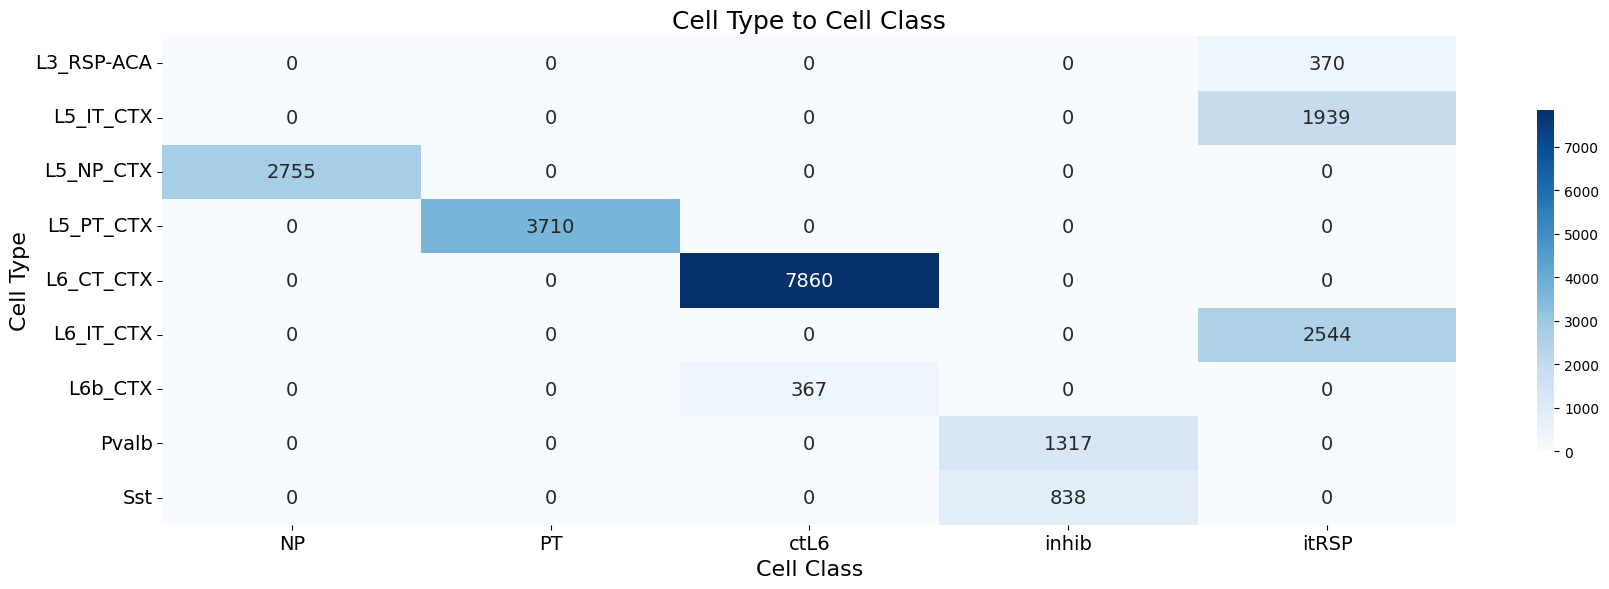

In [7]:
import seaborn as sns

conf_matrix = pd.crosstab(boli.obs["cell_type"], boli.obs["cell_class"])

plt.figure(figsize=(18, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    annot_kws={"fontsize": 14},  # larger annotation text
    cbar_kws={"shrink": 0.7}
)
plt.xlabel("Cell Class", fontsize=16)
plt.ylabel("Cell Type", fontsize=16)
plt.title("Cell Type to Cell Class", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


In [8]:
sc.pp.pca(boli, n_comps = 50)
sc.pp.neighbors(boli)
sc.tl.umap(boli)


/gpfs/home/asun/miniforge3/envs/perturbbench/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


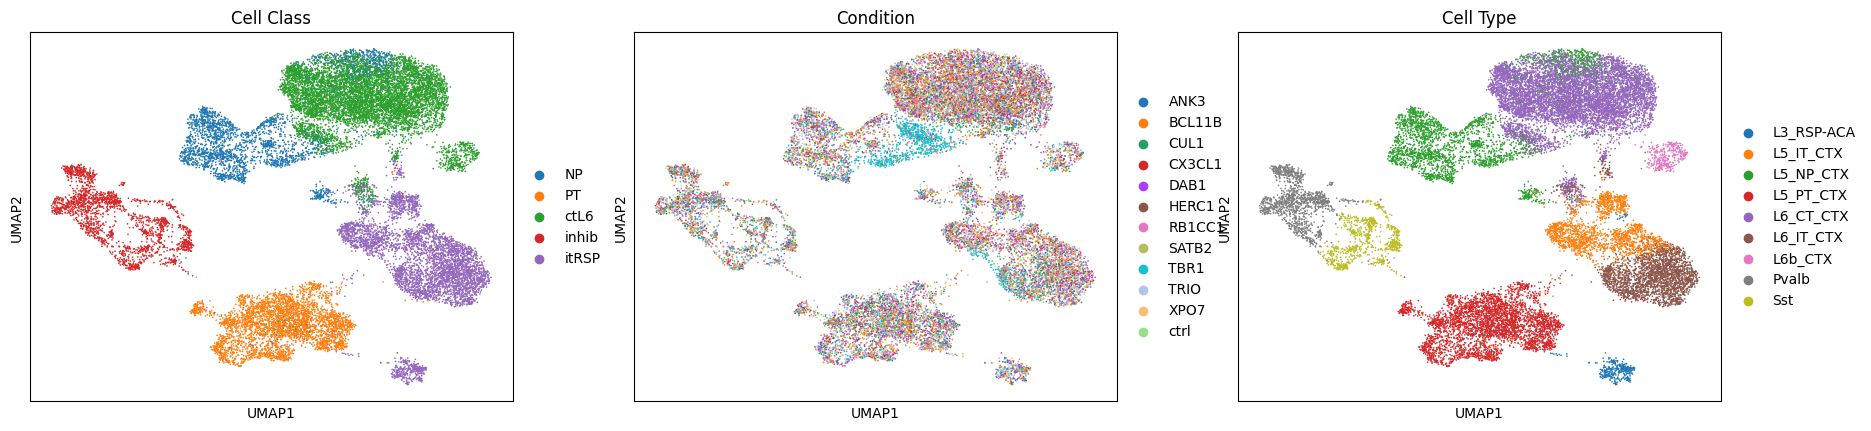

In [9]:
sc.pl.umap(boli, color = ["cell_class", "condition", "cell_type"], title = ["Cell Class", "Condition", "Cell Type"])

In [17]:
print(boli.obs.groupby(["condition", "cell_class"]).size())

condition  cell_class
ANK3       NP             114
           PT             165
           ctL6           489
           inhib          118
           itRSP          283
BCL11B     NP             417
           PT             522
           ctL6          1380
           inhib          398
           itRSP          829
CUL1       NP              91
           PT             144
           ctL6           405
           inhib           96
           itRSP          223
CX3CL1     NP              98
           PT             215
           ctL6           374
           inhib           78
           itRSP          183
DAB1       NP             327
           PT             430
           ctL6          1068
           inhib          248
           itRSP          614
HERC1      NP             162
           PT             267
           ctL6           602
           inhib          165
           itRSP          266
RB1CC1     NP             190
           PT             319
           ctL6   

/tmp/ipykernel_12825/731351896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(boli.obs.groupby(["condition", "cell_class"]).size())


In [20]:
rename_map = {
    "L6_CT_CTX": "ctL6",
    "L6b_CTX": "ctL6",
    "L5_PT_CTX": "PT", 
    "L5_NP_CTX": "NP",
    "L3_RSP-ACA": "itRSP",
    "L4_5_IT_CTX": "itRSP",
    "L2_3_IT_CTX-1": "itRSP",
    "L6_IT_CTX": "itRSP",
    "L5_IT_CTX": "itRSP",
    "L2_3_IT_PPP": "itRSP",
    "L2_3_IT_CTX-2": "itRSP",
    "Sst": "inhib",
    "Pvalb": "inhib",
}

boli.obs["cell_class"] = boli.obs["cell_type"].map(rename_map)


In [18]:
boli.obs["cell_type"] = boli.obs["cell_type"].str.replace(" ", "_")

In [22]:
boli_clean = boli[boli.obs["cell_class"].notna()]


In [23]:
boli.obs["cell_class"].value_counts()

cell_class
ctL6     8227
itRSP    4853
PT       3710
NP       2755
inhib    2155
Name: count, dtype: int64

In [19]:
boli.obs["cell_type"].value_counts()

cell_type
L6_CT_CTX        7860
L4/5_IT_CTX      3761
L5_PT_CTX        3710
L2/3_IT_CTX-1    3122
L5_NP_CTX        2755
L6_IT_CTX        2544
L5_IT_CTX        1939
CT_SUB           1689
Pvalb            1317
L2/3_IT_CTX-2    1120
Sst               838
NP_SUB            468
L3_RSP-ACA        370
L6b_CTX           367
L2/3_IT_PPP       356
L5_IT_TPE-ENT     172
L5_PPP            155
Vip               116
Lamp5             111
Oligo              52
Sncg               51
SUB-ProS           33
Car3               30
Astro              29
NP_PPP             26
CR                 14
Micro-PVM           9
L2_IT_RHP           7
Endo                6
SMC-Peri            5
VLMC                2
V3d                 1
L6_IT_ENTl          1
L6b/CT_ENT          1
L2_IT_ENTl          1
Name: count, dtype: int64

In [15]:
boli.obs["cell_type"] = boli.obs["predicted.subclass"]

In [9]:
boli.obs["condition"].value_counts()

condition
BCL11B+ctrl    3546
TRIO+ctrl      2816
DAB1+ctrl      2687
TBR1+ctrl      2132
ctrl           1781
RB1CC1+ctrl    1616
SATB2+ctrl     1543
HERC1+ctrl     1462
ANK3+ctrl      1169
XPO7+ctrl      1041
CUL1+ctrl       959
CX3CL1+ctrl     948
Name: count, dtype: int64

In [10]:
boli.obs["condition"] = boli.obs["condition"].str.replace("+ctrl", "")

In [11]:
boli.obs["condition"].value_counts()

condition
BCL11B    3546
TRIO      2816
DAB1      2687
TBR1      2132
ctrl      1781
RB1CC1    1616
SATB2     1543
HERC1     1462
ANK3      1169
XPO7      1041
CUL1       959
CX3CL1     948
Name: count, dtype: int64

In [12]:
boli.write("boli_ctx_scprocess_no+ctrl.h5ad")

In [8]:
boli.obs["cell_class"].value_counts()

cell_class
ctL6     8227
itRSP    4853
PT       3710
NP       2755
inhib    2155
Name: count, dtype: int64

In [24]:
# Count cells per condition
counts = boli.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 11
Mean cells per condition: 2754.818181818182
Median cells per condition: 2320.0
Min cells in a condition: 1297
Max cells in a condition: 5367


In [5]:
import numpy as np

In [6]:
after = np.array(boli.X.sum(axis=1)).flatten()


In [7]:
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 170.11923  median = 473.32745  max = 805.77905


# Adamson

In [4]:
adamson = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/adamson.h5ad')
adamson

AnnData object with n_obs × n_vars = 68603 × 5060
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [10]:
after = np.array(adamson.X.sum(axis=1)).flatten()
print("\nPer-cell total counts (after):")
print("min =", after.min(), " median =", np.median(after), " max =", after.max())


Per-cell total counts (after):
min = 453.2576  median = 1271.2089  max = 1869.749


In [11]:
adamson.obs["condition"].unique()

['CREB1+ctrl', 'ctrl', 'ZNF326+ctrl', 'BHLHE40+ctrl', 'DDIT3+ctrl', ..., 'CARS+ctrl', 'TMED2+ctrl', 'P4HB+ctrl', 'SPCS3+ctrl', 'SPCS2+ctrl']
Length: 87
Categories (88, object): ['AARS+ctrl', 'AMIGO3+ctrl', 'ARHGAP22+ctrl', 'ASCC3+ctrl', ..., 'XRN1+ctrl', 'YIPF5+ctrl', 'ZNF326+ctrl', 'ctrl']

In [7]:
# Count cells per condition
counts = adamson.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 87
Mean cells per condition: 509.6551724137931
Median cells per condition: 504.0
Min cells in a condition: 0
Max cells in a condition: 1267


In [50]:
pert_counts = adamson.obs["condition"].value_counts()
pert_counts = pert_counts.reset_index()
pert_counts.columns = ["perturbation", "n_cells"]

target_n = 7000
k = 11

# Sort perturbations randomly to avoid bias
pert_counts = pert_counts.sample(frac=1, random_state=42).reset_index(drop=True)

# Try all combinations is infeasible (>thousands of perts), so greedy heuristic:
chosen = []
total = 0
for _, row in pert_counts.iterrows():
    if len(chosen) < k and total + row["n_cells"] <= target_n:
        chosen.append(row["perturbation"])
        total += row["n_cells"]

print("Chosen perts:", chosen)
print("Total cells:", total)

Chosen perts: ['CARS+ctrl', 'ZNF326+ctrl', 'SEL1L+ctrl', 'BHLHE40+ctrl', 'MRGBP+ctrl', 'SLC39A7+ctrl', 'SOCS1+ctrl', 'SRPR+ctrl', 'DNAJC19+ctrl', 'UFL1+ctrl', 'TIMM44+ctrl']
Total cells: 5135


In [52]:
import numpy as np
import pandas as pd

def select_perturbations_greedy(adata, target_n, k=11, obs_key="condition", random_state=42):
    """
    Select k perturbations whose total cell count is as close as possible to target_n
    using a simple greedy heuristic (under target first, then fill to k with smallest left).

    Parameters
    ----------
    adata : AnnData
        Your dataset; counts per perturbation taken from adata.obs[obs_key].
    target_n : int
        Desired total number of cells across the selected perturbations.
    k : int, default 11
        Number of perturbations to select.
    obs_key : str, default "condition"
        obs column that encodes the perturbation label.
    random_state : int
        Shuffles the order to avoid bias among ties.

    Returns
    -------
    chosen : list[str]
        Selected perturbation labels (length k).
    total_cells : int
        Sum of cells across the chosen perturbations.
    counts_df : pd.DataFrame
        DataFrame with columns ['perturbation','n_cells'] (shuffled order used).
    """
    # counts per perturbation
    counts = adata.obs[obs_key].value_counts()
    counts_df = counts.reset_index()
    counts_df.columns = ["perturbation", "n_cells"]

    # shuffle to avoid systematic bias
    counts_df = counts_df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    chosen = []
    total = 0

    # pass 1: add while staying <= target
    for _, row in counts_df.iterrows():
        if len(chosen) >= k:
            break
        if total + row["n_cells"] <= target_n:
            chosen.append(row["perturbation"])
            total += row["n_cells"]

    # pass 2: if we still need more, add smallest remaining (may exceed target)
    if len(chosen) < k:
        remaining = counts_df[~counts_df["perturbation"].isin(chosen)].sort_values("n_cells")
        for _, row in remaining.iterrows():
            if len(chosen) >= k:
                break
            chosen.append(row["perturbation"])
            total += row["n_cells"]

    return chosen, int(total), counts_df

In [53]:
select_perturbations_greedy(adamson,7000)

(['AARS+ctrl',
  'EIF2B4+ctrl',
  'SYVN1+ctrl',
  'XRN1+ctrl',
  'KCTD16+ctrl',
  'TARS+ctrl',
  'MRPL39+ctrl',
  'HSPA5+ctrl',
  'CHERP+ctrl',
  'PPWD1+ctrl',
  'EIF2S1+ctrl'],
 5748,
    perturbation  n_cells
 0     AARS+ctrl      360
 1          ctrl    24263
 2   EIF2B4+ctrl      545
 3    SYVN1+ctrl      553
 4     XRN1+ctrl      621
 ..          ...      ...
 83   TELO2+ctrl      562
 84   HYOU1+ctrl      432
 85   STT3A+ctrl      391
 86  AMIGO3+ctrl      616
 87    P4HB+ctrl      471
 
 [88 rows x 2 columns])

# Dixit

In [9]:
dixit = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/dixit.h5ad')
dixit

AnnData object with n_obs × n_vars = 44735 × 5012
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [10]:
# Count cells per condition
counts = dixit.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 19
Mean cells per condition: 1720.6842105263158
Median cells per condition: 1489.0
Min cells in a condition: 322
Max cells in a condition: 4721


In [12]:
dixit.obs["condition"].unique()

['CREB1+ctrl', 'GABPA+ctrl', 'IRF1+ctrl', 'ELK1+ctrl', 'ctrl', ..., 'AURKC+ctrl', 'AURKA+ctrl', 'AURKB+ctrl', 'TOR1AIP1+ctrl', 'RACGAP1+ctrl']
Length: 20
Categories (20, object): ['AURKA+ctrl', 'AURKB+ctrl', 'AURKC+ctrl', 'CENPE+ctrl', ..., 'RACGAP1+ctrl', 'TOR1AIP1+ctrl', 'YY1+ctrl', 'ctrl']

# Norman

In [11]:
norman = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/norman.h5ad')
norman

AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [16]:
single_mask = norman.obs["condition"].str.contains(r"\+ctrl$")
norman_single = norman[single_mask].copy()


In [17]:
norman_single

AnnData object with n_obs × n_vars = 33611 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [18]:
# Count cells per condition
counts = norman_single.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 104
Mean cells per condition: 323.1826923076923
Median cells per condition: 291.0
Min cells in a condition: 97
Max cells in a condition: 997


In [13]:
norman.obs["condition"].unique()

['TSC22D1+ctrl', 'KLF1+MAP2K6', 'ctrl', 'CEBPE+RUNX1T1', 'MAML2+ctrl', ..., 'STIL+ctrl', 'CDKN1C+ctrl', 'ctrl+CDKN1B', 'CDKN1B+CDKN1A', 'C3orf72+FOXL2']
Length: 284
Categories (284, object): ['AHR+FEV', 'AHR+KLF1', 'AHR+ctrl', 'ARID1A+ctrl', ..., 'ZC3HAV1+HOXC13', 'ZC3HAV1+ctrl', 'ZNF318+FOXL2', 'ZNF318+ctrl']

# Replogle k562 Essential

In [14]:
k562 = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/replogle_k562_essential.h5ad')
k562

AnnData object with n_obs × n_vars = 162751 × 5000
    obs: 'condition', 'cell_type', 'cov_drug_dose_name', 'dose_val', 'control', 'condition_name'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [15]:
# Count cells per condition
counts = k562.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 1092
Mean cells per condition: 139.24908424908426
Median cells per condition: 115.0
Min cells in a condition: 15
Max cells in a condition: 765


In [14]:
k562.obs["condition"].unique()

['UBL5+ctrl', 'TIMM9+ctrl', 'SMG5+ctrl', 'MED9+ctrl', 'MED1+ctrl', ..., 'PSMB2+ctrl', 'BMS1+ctrl', 'BUD31+ctrl', 'SNRPC+ctrl', 'RPS2+ctrl']
Length: 1093
Categories (1093, object): ['AAMP+ctrl', 'AARS+ctrl', 'AATF+ctrl', 'ABCB7+ctrl', ..., 'ZNF574+ctrl', 'ZNHIT6+ctrl', 'ZNRD1+ctrl', 'ctrl']

# Replogle rpe1 Essential

In [20]:
rpe1 = sc.read_h5ad('/gpfs/home/asun/jin_lab/perturbench/0_datasets/replogle_rpe1_essential.h5ad')
rpe1

AnnData object with n_obs × n_vars = 162733 × 5000
    obs: 'condition', 'cell_type', 'cov_drug_dose_name', 'dose_val', 'control', 'condition_name'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'

In [21]:
# Count cells per condition
counts = rpe1.obs["condition"].value_counts()
counts_no_ctrl = counts.drop("ctrl", errors="ignore")

# 2. Summary statistics
mean_cells   = counts_no_ctrl.mean()
median_cells = counts_no_ctrl.median()
min_cells    = counts_no_ctrl.min()
max_cells    = counts_no_ctrl.max()

print("Number of conditions:", counts_no_ctrl.shape[0])
print("Mean cells per condition:", mean_cells)
print("Median cells per condition:", median_cells)
print("Min cells in a condition:", min_cells)
print("Max cells in a condition:", max_cells)

Number of conditions: 1543
Mean cells per condition: 98.02203499675956
Median cells per condition: 66.0
Min cells in a condition: 13
Max cells in a condition: 3458


In [15]:
rpe1.obs["condition"].unique()

['SRCAP+ctrl', 'RRP12+ctrl', 'NOMO3+ctrl', 'ACTB+ctrl', 'SETD5+ctrl', ..., 'CPEB1+ctrl', 'CTPS1+ctrl', 'TAF10+ctrl', 'CLSPN+ctrl', 'POLE+ctrl']
Length: 1544
Categories (1544, object): ['AARS+ctrl', 'AASDHPPT+ctrl', 'AATF+ctrl', 'ABCB7+ctrl', ..., 'ZRSR2+ctrl', 'ZW10+ctrl', 'ZWINT+ctrl', 'ctrl']